# Introduction to Qiskit


Qiskit is an open-source software development kit (SDK) for working with quantum computers at the level of circuits, pulses, and algorithms. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices on IBM Quantum Experience or on simulators on a local computer.


## Qiskit Terra

The Qiskit Terra is the ground on which the rest of Qiskit stands. The library contains elements to create quantum circuits close to the quantum machine code (qiskit/python is interface between us and the quantum machine). It also contains the code to optimise algorithm running on particular machines. Terra package also manages the executed jobs.  

We could alternativelly work with the quantum machine language using the quantum registry. This would be "pure" approach, but very inconvenient -- the value of Python is that it speeds up the time to delivery. 


## Qiskit Aer

The element Aer provides high-performance quantum computing simulators with realistic noise models. We will use  during the course mostly simulators and we will also use simulators, which realistically mimic the real quantum computer. 


## Deprecated Elements (you may found references to them)

### Qiskit Ignis

The library provided quantum hardware verification, noise characterization, and error correction. Now, it was replaced by Qiskit Experiments.

### Qiskit Aqua

The library provided number of different algorithms to employ the quantum computers on specific problems. This was deprecated by growing number of specific libraries (eg, Finance, Chemistry etc). The paradigm beyond the algorithms also changed (more universal). 




## Reminder

I expect you have been able to link your IBMQ account to local environment. 

from qiskit import IBMQ

IBMQ.save_account(TOKEN)





In [2]:
# Import numpy
import numpy as np

# Import basic object from the Qiskit
from qiskit import QuantumCircuit

# Load account from the disk
from qiskit import IBMQ
IBMQ.load_account('13c954e3b828e33235492120ddf3e34a1dbcb3899b752e044508d16f1b13bcefaccb7883a85f49e920602b86fdbf58f6d0147b7837310bb35e472c65329f74f5') 



ModuleNotFoundError: No module named 'qiskit'

In [2]:
# Check the version of the qiskit you use

# Compared to previous class, I have installed the up-to-date version
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

## Basic Building Blocks

Let us explore every bit step by step. We will use simulator. The real quantum resource is scarce and IBM is implementing a fair usage policy. It is thus better to use simulator during majority of the development process.

In [3]:
from qiskit import Aer
from qiskit import execute

# We will need this for plots
from qiskit.visualization import plot_histogram,plot_bloch_multivector
simulator = Aer.get_backend('qasm_simulator')

### Properties of single qubit

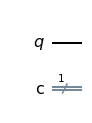

In [4]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)
%matplotlib inline
circuit.draw('mpl')

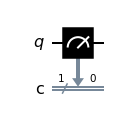

In [5]:
# Let us measure the single qubit
circuit.measure([0], [0])
circuit.draw('mpl')

In [6]:
# Execute the circuit in the simulator
job = execute(circuit, simulator, shots=1024)

# Take result
result = job.result()

# Counts
counts = result.get_counts(circuit)
counts

{'0': 1024}

Qubit starts always oriented "south". 

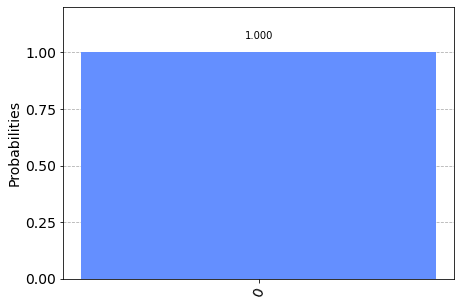

In [7]:
# Qiskit has a visualisation tools as well
plot_histogram(counts)

We know the initial setup of the circuit in the theoretical setup. 

Let us also depict the state vector.


In [8]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

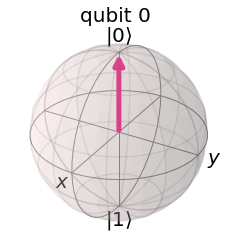

In [9]:
plot_bloch_multivector(state)

We can assemble the circuit into the quantum object (this can be more convenient for advanced circuits). This is alternative to what we have done so far.

Remark: |0> points up!

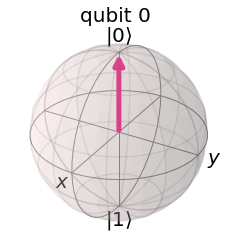

In [10]:
from qiskit import assemble

# Creates an object, where we assembled elements together
qobj = assemble(circuit)

# Run the assembled object and from results get the state vector
state_vector = simulator.run(qobj).result().get_statevector()

# Plot the picture
plot_bloch_multivector(state_vector)

## Two simple qubits

Let us build two simple qubits and see how the visualisation works.

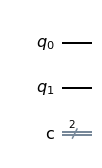

In [11]:
# Create quantum circuit 
circuit = QuantumCircuit(2,2)

circuit.draw('mpl')

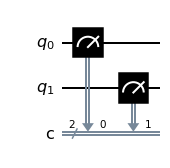

In [12]:
# Let us measure the single qubit
circuit.measure([0,1], [0,1])
circuit.draw('mpl')

In [13]:
# Execute the circuit in the simulator
job = execute(circuit, simulator, shots=1024)

# Take result
result = job.result()

# Counts
counts = result.get_counts(circuit)
counts

{'00': 1024}

Qubit starts always oriented "south". 

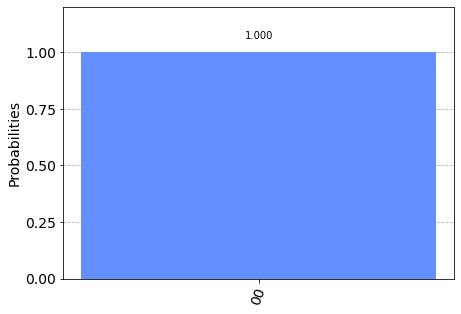

In [14]:
# Qiskit has a visualisation tools as well
plot_histogram(counts)

In [15]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

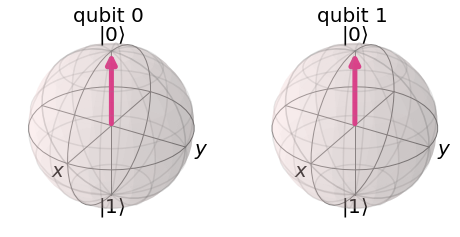

In [16]:
plot_bloch_multivector(state)

Pretty neat, isn't it?

## The measurement

We have added the measurement at the end of the circuit. This allows us to map the state into the classical registry. This step is performing a final projection of the quantum state into either |0> or |1> (keep in moind that quantum system during the evolution through the circuit in both states at the same and only at the moment, when we perform a measurement, we learn in which state it is).

We are using state vectors in the simulations. We can view the state of the system anytime without performing a measurement (we can observe the state in the superposition, as visualised on Bloch sphere).


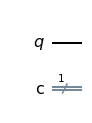

In [17]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

circuit.draw('mpl')

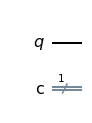

In [18]:
# Let us measure the single qubit -- skip this now
# circuit.measure([0], [0])
circuit.draw('mpl')

In [19]:
# Execute the circuit in the simulator
job = execute(circuit, simulator, shots=1024)

# Take result
result = job.result()

# Counts
counts = result.get_counts(circuit)
counts

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fcf0def0430>"'

We cannot measure counts as we do not take measurement!

We can depict the state vector on the Bloch spehere though. This allows us to theoretically inspect what we are intending to do. 

In [ ]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

In [ ]:
plot_bloch_multivector(state)

## X-gate 

Let us add the first basic gate, the Pauli-X gate, or NOT gate or $\sigma_X$. The matrix representation is

$$
\sigma_X = 
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

which acts on the qubit as


$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
|0>\\
|1>
\end{pmatrix}=
\begin{pmatrix}
|1>\\
|0>
\end{pmatrix}
$$

where the gate flips the values (negates):

$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1\\
0
\end{pmatrix}=
\begin{pmatrix}
0\\
1
\end{pmatrix}
$$

In [20]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

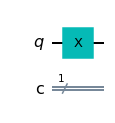

In [21]:
# Add the X gate
circuit.x(0)
circuit.draw('mpl')

In [22]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

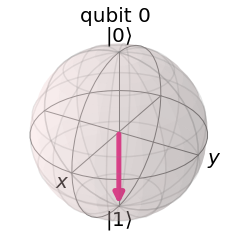

In [23]:
plot_bloch_multivector(state)

The arrow is flipped (north to south and south to north). 

We add measurement (the arrow down will get projected down...)

In [24]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

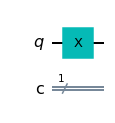

In [25]:
# Add the X gate
circuit.x(0)
circuit.draw('mpl')

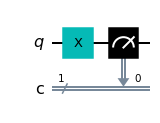

In [26]:
# Let us measure the single qubit
circuit.measure([0], [0])
circuit.draw('mpl')

In [27]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

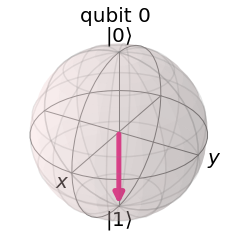

In [28]:
plot_bloch_multivector(state)

## Y-gate 

Next, the Pauli-Y gate, or $\sigma_Y$. The matrix representation is

$$
\sigma_X = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

which acts on the qubit as


$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
\begin{pmatrix}
|0>\\
|1>
\end{pmatrix}=
\begin{pmatrix}
-i|1>\\
i|0>
\end{pmatrix}
$$



In [29]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

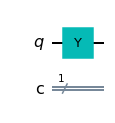

In [30]:
# Add the Y gate
circuit.y(0)
circuit.draw('mpl')

In [31]:
# Let us measure the single qubit
# circuit.measure([0], [0])
# circuit.draw('mpl')

In [32]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

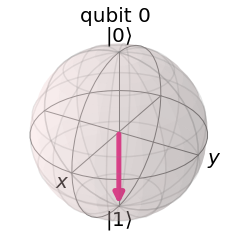

In [33]:
plot_bloch_multivector(state)

The arrow is flipped -- but we have flipped (rotated around y-axis by $\pi$). The X-gate is performing rotation by $\pi$ around x-axis.

## Z-gate 

Finally, the Pauli-Z gate, or $\sigma_Z$. The matrix representation is

$$
\sigma_X = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

which acts on the qubit as


$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
\begin{pmatrix}
|0>\\
|1>
\end{pmatrix}=
\begin{pmatrix}
|0>\\
-|1>
\end{pmatrix}
$$



In [34]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

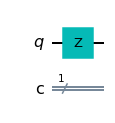

In [35]:
# Add the Y gate
circuit.z(0)
circuit.draw('mpl')

In [36]:
# Let us measure the single qubit
# circuit.measure([0], [0])
# circuit.draw('mpl')

In [37]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

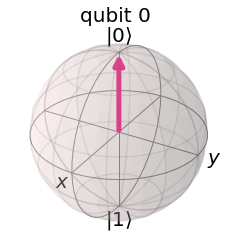

In [38]:
plot_bloch_multivector(state)

The arrow is unchanged, why? (hint: rotating around z-axis by $\pi$)

## Bit of Mathematics

There is an assertion saying that square root of every Pauli matrix is an identity operator, i.e.,

$$X^2=Y^2=Z^2=I$$

We can use calculus to prove this:

$$X^2 = X X^{*} = \begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix} \begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
0+1 & 0+0\\
0+0 & 1+0
\end{pmatrix}
=
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$

We can proceed analogously with other two. Let us use Qiskit to show this:

In [39]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

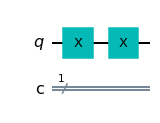

In [40]:
# Add the X gate
circuit.x(0)
# Add another X gate
circuit.x(0)
circuit.draw('mpl')

In [41]:
# Let us measure the single qubit
# circuit.measure([0], [0])
# circuit.draw('mpl')

In [42]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

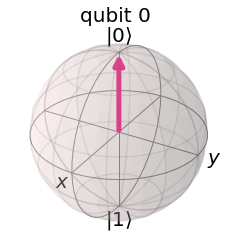

In [43]:
plot_bloch_multivector(state)

We are back at the original qubit. 

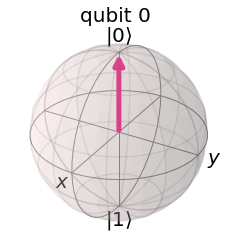

In [44]:
# Case of Y*Y

# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add the Y gate
circuit.y(0)
# Add another Y gate
circuit.y(0)
circuit.draw('mpl')

# Let us measure the single qubit
# circuit.measure([0], [0])

# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

You can prove Z*Z on your own. 

# Hadamard gate

The most essential gate in qiskit. The gate can be represented as:

$$
H=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

The gate acts as:

$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
|0>\\
|1>
\end{pmatrix}=
\begin{pmatrix}
\frac{|0>+|-1>}{\sqrt{2}}\\
\frac{|0>-|-1>}{\sqrt{2}}
\end{pmatrix}
$$

The gate is often used to transform the qubit in the initial state to a superposition of both $|0>$ and $|1>$.

In [45]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

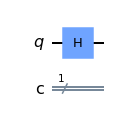

In [46]:
# Add the H gate
circuit.h(0)

circuit.draw('mpl')

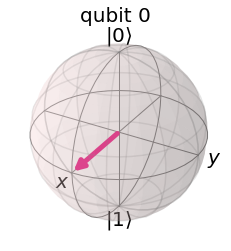

In [47]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

The state is a mixture of |0> and |1> (cat is both dead and alive). When we add measurement, we force it to collapse to either |0> or |1>. 

In [48]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

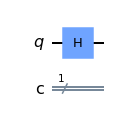

In [49]:
# Add the H gate
circuit.h(0)

circuit.draw('mpl')

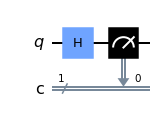

In [50]:
# Let us measure the single qubit
circuit.measure([0], [0])
circuit.draw('mpl')

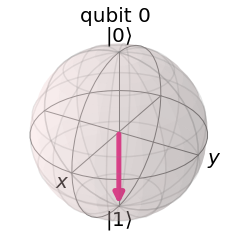

In [51]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

The state collapsed. We can apply counting:

In [52]:
# Counts
counts = result.get_counts(circuit)
counts

{'0': 530, '1': 494}

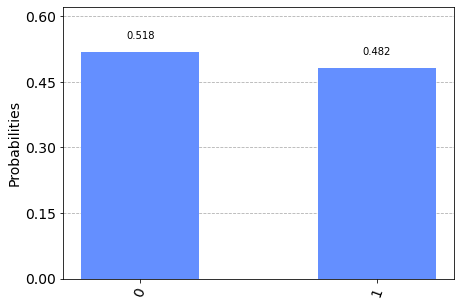

In [53]:
plot_histogram(counts)

There is a balanced likelihood we end up in |0> or |1>. Once we take measurement, there is equal chance that we ned up eithe rin |0> or |1>.

### Mathematical Observation

Hadamard gate has a property:

$$
HH^{*}=I
$$

This is easy to illustrate using matrix calculus:

$$
H=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
-1 & 1
\end{pmatrix}
$$

complex conjugate
$$
H^{*}=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
1 & 1
\end{pmatrix}
$$

and 

$$
HH^{*}=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
-1 & 1
\end{pmatrix}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
1 & 1
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
1+1 & 1-1\\
1-1 & 1+1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}
$$

i.e., similar to Pauli matrices. We can proceed in the same way as above. Let us focus more on qiskit side. 


### Adding n  Hadamard Gates

We can script the composition of circuit -- think about creating deep neural network. 

In [54]:
def addHadamardGates(circuit, indexGate, n):
    for i in range(n):
        circuit.h(indexGate)
    return 1

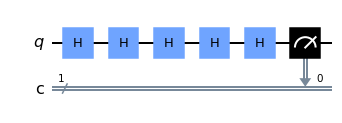

In [55]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 5)

# Add measurement
circuit.measure([0], [0])

# Plot
circuit.draw('mpl')

In [56]:
# Execute the circuit in the simulator
job = execute(circuit, simulator, shots=1024)

# Take result
result = job.result()

# Counts
result.get_counts(circuit)

{'1': 523, '0': 501}

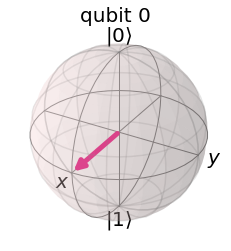

In [57]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 5)

# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

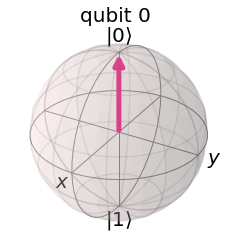

In [58]:
# 6 Hadamard gates

# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 6)

# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

## The Quantum Computers are noisy...

So far, we have been using an idealised quantum computer in the simulator. The simulator thus provided a perfect outcome without any noise due to the imperfect hardware. If we would run the code on the real quantum computer, we would not achieve the idealised case. 

* Luckily, we can explore the effect of noise by setting the simulator to be noisy.

* The noise can be of any form:

    * Theoretical form
    * Reflecting the real quantum computer
    
We set the simulator noisy to mimick the real quantum computer.


In [59]:
from qiskit.providers.aer.noise import NoiseModel

# Choose a particuler quantum computer 
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_belem')

# We derive the noise model from the chosen quantum computer
noise_model = NoiseModel.from_backend(backend)

# Further, we assume the specific qauntum computer:
# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

ibmqfactory.load_account:WARNING:2022-02-28 17:26:37,445: Credentials are already in use. The existing account in the session will be replaced.


Let us explore the basic elements again using the noisy simulator. 

In [60]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

TranspilerError: "Unable to map source basis {('save_statevector', 1)} to target basis {'measure', 'id', 'cx', 'rz', 'reset', 'sx', 'snapshot', 'x', 'barrier', 'delay'} over library <qiskit.circuit.equivalence.EquivalenceLibrary object at 0x7fcf0cffc0d0>."

We cannot use the state vector, we are now working with "real" quantum computer and not a theoretical setup.

In [ ]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add measurement
circuit.measure([0], [0])

# Run the simulator
job = execute(circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
counts =  result.get_counts(0)

plot_histogram(counts)

We see the difference! The noise took its toll and we see |1> cases. 

In [ ]:
# Run the simulator with noise -- wrap it up
def executeWithNoise(crt):
    return execute(crt, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=1024)

The noise is getting prominent with depth of the circuit. We can use the n-Hadamard Gates function!

* The case above is 0-Hadamard Gates case

* We use even number of gates

### 2 Hadamard Gates

In [ ]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 2)

# Add measurement
circuit.measure([0], [0])

# Run the simulator
job = executeWithNoise(circuit)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
counts2 =  result.get_counts(0)

plot_histogram(counts2)


### 4 Hadamard Gates

In [ ]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 4)

# Add measurement
circuit.measure([0], [0])

# Run the simulator
job = executeWithNoise(circuit)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
counts4 =  result.get_counts(0)

plot_histogram(counts4)


### 6 Hadamard Gates

In [ ]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 6)

# Add measurement
circuit.measure([0], [0])

# Run the simulator
job = executeWithNoise(circuit)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
counts6 =  result.get_counts(0)

plot_histogram(counts6)


### 8 Hadamard Gates

In [ ]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add an H gate to qubit 0
addHadamardGates(circuit, 0, 8)

# Add measurement
circuit.measure([0], [0])

# Run the simulator
job = executeWithNoise(circuit)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
counts8 =  result.get_counts(0)

plot_histogram(counts8)


Adding pair(s) of Hadamard gates does not cause explosion of the noise. We can keep monitoring the more complex circuits. 

This brings an interesting question... how is the quantum circuit we specify in our code executed on the quantum computer. 

# Qiskit and the Quantum Circuit

We use qiskit to create a quantum circuit (series of steps on a specified number of quibits). Let us get more intuition how the code we writes links to the real quantum device. 

We use ibmq_belem machine. 

In [ ]:
# The object IBMQ contains information about connections etc
IBMQ.providers()    

In [ ]:
# Get a provider from the IBMQ object
provider = IBMQ.get_provider(hub = 'ibm-q')

In [61]:
# And all available backends
ibmq_backends = provider.backends()
ibmq_backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [62]:
device = provider.backends('ibmq_belem')

In [63]:
device[0]

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

The Configuration shows how the physical circuit is set up. When we write our circuit, we have not been taking the physical device into account (for example what qubits are coupled together... even the number of qubits). 

What happens when we run "execute" function? 

The execute contains step, which is called "transpile". This step is translating our intended circuit (set of our instructions) into a setup, which is optimal for a given quantum machine (or simulator). This step is expressing the gates (H, X, SWAP, SQRT_NOT,...) into elementary physical gates and redraws the circuit such that it is optimal for a given physical device -- optimisation process. 


## Example

Below is an example of the steps done when we transpile the intended circuit into the circuit suitable for a given quantum machine. (source: qiskit tutorials)

![transpile](Figs/transpileSchema.png)

There set of steps is more complicated. There are different levels of optimisations, we can even bypass the optimisation as set the entire circuit manually (beyond scope of even advanced QC classes). 

Let us illustrate the decomposition of the provided gate into a elementary gates. 
 

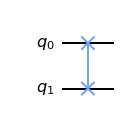

In [64]:
# Decomposition into the basis gates -- swap gate provided by library
swap_circuit = QuantumCircuit(2)
swap_circuit.swap(0, 1)
swap_circuit.draw(output='mpl')

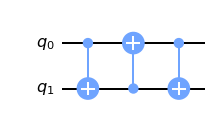

In [65]:
# Decomposed version in the basis gates
swap_circuit_dec = swap_circuit.decompose()
swap_circuit_dec.draw(output='mpl')

For the rest of our class, we will use "execute" and rely on optimisation done underneath. 

## SQRT NOT Gate

Let us add the first basic gate, the Pauli-X gate, or NOT gate or $\sigma_X$. The matrix representation is

$$
\sqrt{X} = 
\frac{1}{2}
\begin{pmatrix}
1+i & 1-i\\
1-i & 1+i
\end{pmatrix}
$$



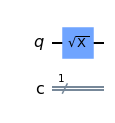

In [66]:
# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add the square root of X gate
circuit.sx(0)

# Plot
circuit.draw('mpl')

In [67]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

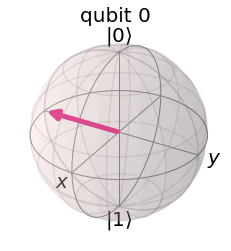

In [68]:
plot_bloch_multivector(state)

## Rotation Gates

There are three basic rotations (around each of the three axis).

* x
* y
* z


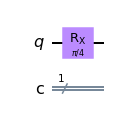

In [69]:
from math import pi

# Create quantum circuit 
circuit = QuantumCircuit(1,1)

# Add the square root of X gate
circuit.rx(pi/4,0)

# Plot
circuit.draw('mpl')

In [70]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

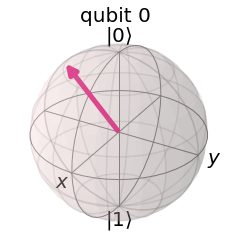

In [71]:
plot_bloch_multivector(state)

You can try:

* ry
* rz




Let us continue with two-quibit gates...

## CNOT

Control-not gate. The gate operates on two states. 

* The first qubit is control
* The second qubit is target

If control qubit is |0> -> the target qubit is unchanged.

If control qubit is |1> -> the target qubit is flipped. 



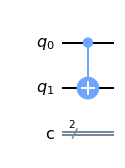

In [72]:
# Create quantum circuit 
circuit = QuantumCircuit(2,2)

# Add the square root of X gate
circuit.cnot(0,1)

# Plot
circuit.draw('mpl')

In [73]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

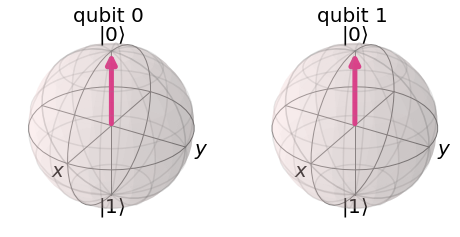

In [74]:
plot_bloch_multivector(state)

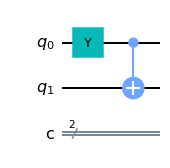

In [75]:
# Create quantum circuit 
circuit = QuantumCircuit(2,2)

# Flip the control qubit
circuit.y(0)

# Add the square root of X gate
circuit.cnot(0,1)

# Plot
circuit.draw('mpl')

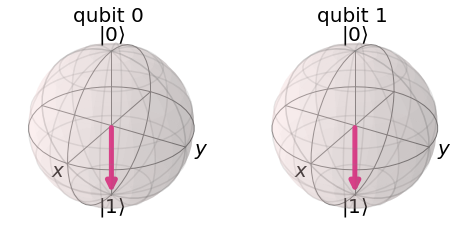

In [76]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

We have flipped the control gate and thus the target gate is flipped.

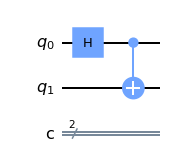

In [77]:
# Create quantum circuit 
circuit = QuantumCircuit(2,2)

# Turn the state vector of the control qubit with Hadamard gate
circuit.h(0)

# Add the square root of X gate
circuit.cnot(0,1)

# Plot
circuit.draw('mpl')

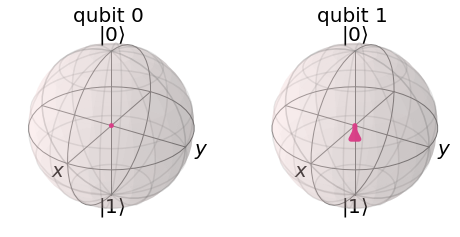

In [78]:
# Save the current simulator quantum state as a statevector
circuit.save_statevector()

# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# We extract the state vector (not counts as before)
state= result.get_statevector()

plot_bloch_multivector(state)

State vector does not help... let us use counts. 

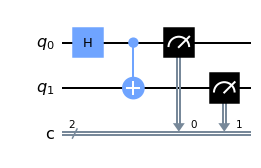

In [79]:
# Create quantum circuit 
circuit = QuantumCircuit(2,2)

# Turn the state vector of the control qubit with Hadamard gate
circuit.h(0)

# Add the square root of X gate
circuit.cnot(0,1)

# Add measurement
circuit.measure([0,1], [0,1])

# Plot
circuit.draw('mpl')

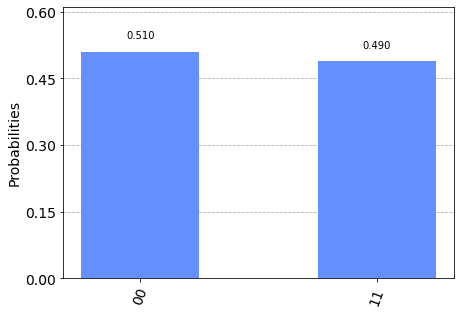

In [80]:
# Run the simulator
job = execute(circuit, simulator, shots=1024)

# Get the results
result = job.result()

# Counts
counts = result.get_counts(circuit)


plot_histogram(counts)

## Other Gates to explore

Controlled rotation gate: crz(pi/2,q[0],q[1])

Swap gate: swap(q[0], q[1])

The Toffoli gate (flips the third qubit if the first two qubits are 1): ccx(q[0], q[1], q[2])
